In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
co2 = pd.read_csv("C:/Users/HP/Downloads/CO2_emission.csv")
co2.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


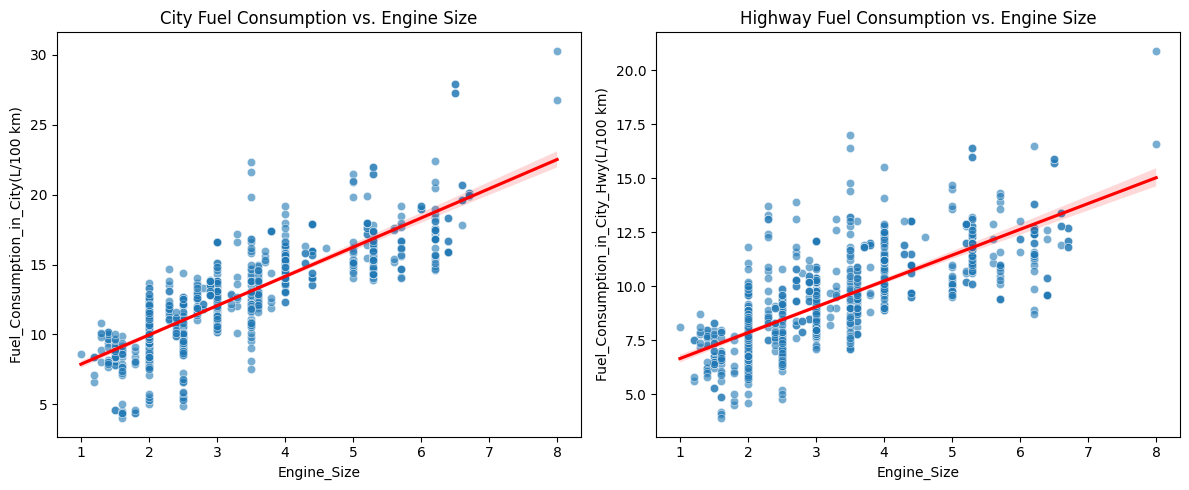

In [4]:
# How does fuel consumption (city vs. highway) vary with engine size?
import seaborn as sns
plt.figure(figsize=(12, 5))

# City
plt.subplot(1, 2, 1)
sns.scatterplot(x='Engine_Size', y='Fuel_Consumption_in_City(L/100 km)', data=co2, alpha=0.6)
sns.regplot(x='Engine_Size', y='Fuel_Consumption_in_City(L/100 km)', data=co2, scatter=False, color='red')
plt.title('City Fuel Consumption vs. Engine Size')

# Highway
plt.subplot(1, 2, 2)
sns.scatterplot(x='Engine_Size', y='Fuel_Consumption_in_City_Hwy(L/100 km)', data=co2, alpha=0.6)
sns.regplot(x='Engine_Size', y='Fuel_Consumption_in_City_Hwy(L/100 km)', data=co2, scatter=False, color='red')
plt.title('Highway Fuel Consumption vs. Engine Size')

plt.tight_layout()
plt.show()

#Insight: Look for whether fuel use rises linearly or levels off with larger engines.


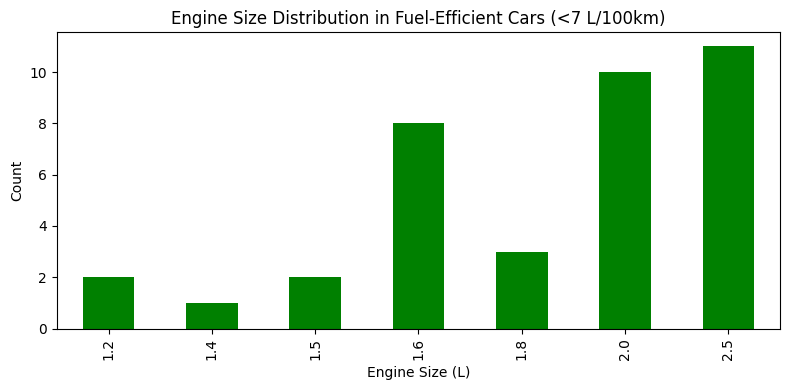

In [5]:
#Which engine sizes are most common in fuel-efficient vehicles?
efficient_cars = co2[co2['Fuel_Consumption_comb(L/100km)'] < 7]

efficient_engine_counts = efficient_cars['Engine_Size'].value_counts().sort_index()

efficient_engine_counts.plot(kind='bar', color='green', figsize=(8, 4))
plt.title('Engine Size Distribution in Fuel-Efficient Cars (<7 L/100km)')
plt.xlabel('Engine Size (L)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


                   Fuel_Consumption_comb(L/100km)  CO2_Emissions
Transmission_Type                                               
Automated Manual                        11.362903     266.693548
Automatic                               11.100137     259.224658
Manual                                  10.237037     239.765432


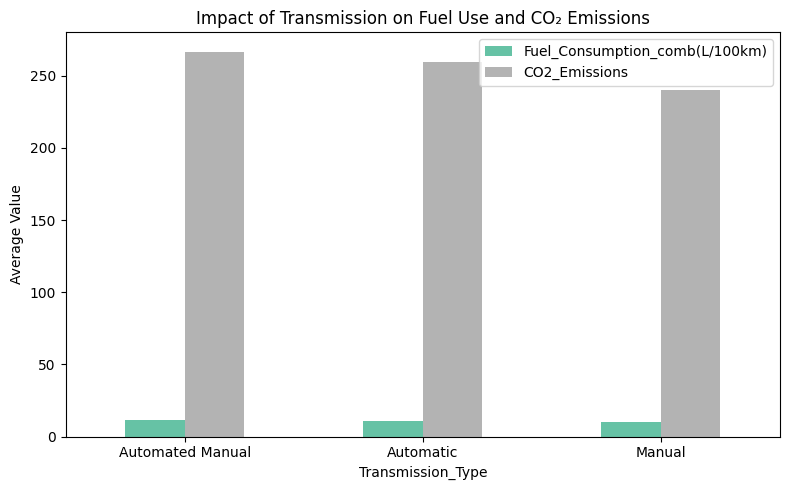

In [7]:
#How does transmission type impact fuel consumption and emissions?
def classify_transmission(x):
    x = x.upper()
    if x.startswith('AM'):
        return 'Automated Manual'
    elif x.startswith('AS'):
        return 'Automatic'
    elif x.startswith('A'):
        return 'Automatic'
    elif x.startswith('M'):
        return 'Manual'
    elif x.startswith('AV'):
        return 'Continuously Variable (CVT)'
    else:
        return 'Other'

co2['Transmission_Type'] = co2['Transmission'].apply(classify_transmission)

transmission_stats = co2.groupby('Transmission_Type')[['Fuel_Consumption_comb(L/100km)', 'CO2_Emissions']].mean()

print(transmission_stats)

# Bar plot
transmission_stats.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('Impact of Transmission on Fuel Use and CO₂ Emissions')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Most highway-efficient classes:
Vehicle_Class
Station wagon: Small    7.135000
Compact                 7.581928
Mid-size                7.964035
Minivan                 8.257143
SUV: Small              8.639062
Name: Fuel_Consumption_in_City_Hwy(L/100 km), dtype: float64


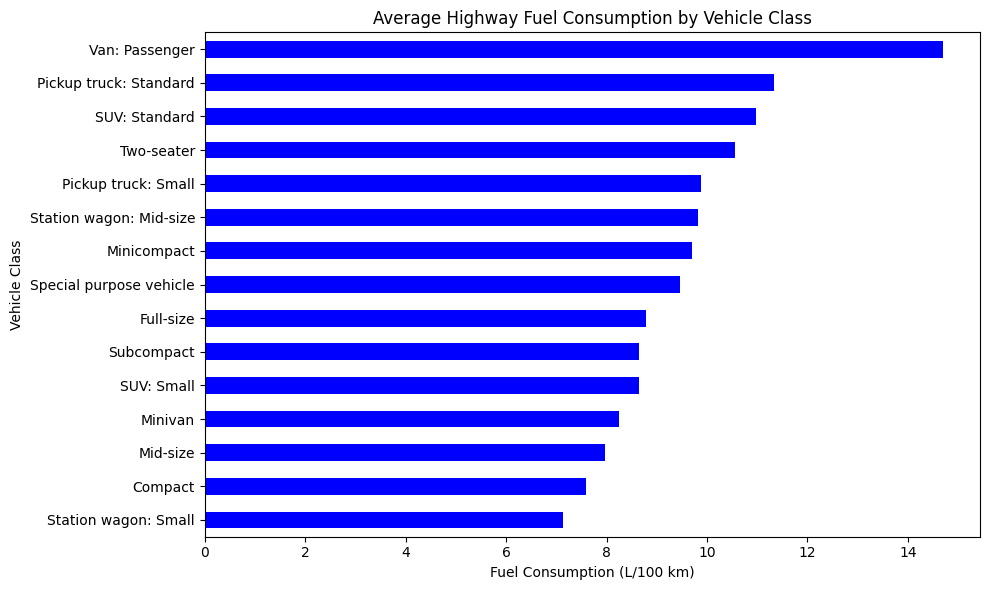

In [8]:
#Which vehicle class has the highest average highway fuel efficiency? Fuel efficiency = lower Fuel_Consumption_in_City_Hwy(L/100 km):
highway_efficiency = co2.groupby('Vehicle_Class')['Fuel_Consumption_in_City_Hwy(L/100 km)'].mean().sort_values()

print("Most highway-efficient classes:")
print(highway_efficiency.head())

# Plot
highway_efficiency.plot(kind='barh', figsize=(10, 6), color='blue')
plt.title('Average Highway Fuel Consumption by Vehicle Class')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('Vehicle Class')
plt.tight_layout()
plt.show()


Avg CO₂ for <2.0L engines: 175.73170731707316
Avg CO₂ for >=2.0L engines: 266.4888628370457


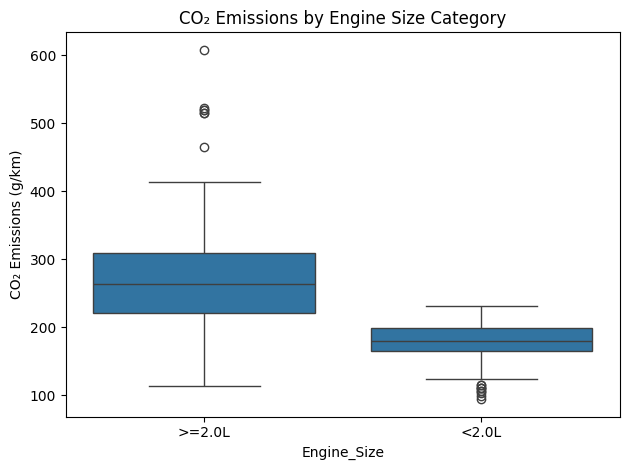

In [9]:
# Do smaller engines (e.g., <2.0L) consistently produce lower emissions?
small_engines = co2[co2['Engine_Size'] < 2.0]
large_engines = co2[co2['Engine_Size'] >= 2.0]

print("Avg CO₂ for <2.0L engines:", small_engines['CO2_Emissions'].mean())
print("Avg CO₂ for >=2.0L engines:", large_engines['CO2_Emissions'].mean())

# Boxplot for more detail
sns.boxplot(x=(co2['Engine_Size'] < 2.0), y='CO2_Emissions', data=co2)
plt.xticks([0, 1], ['>=2.0L', '<2.0L'])
plt.title('CO₂ Emissions by Engine Size Category')
plt.ylabel('CO₂ Emissions (g/km)')
plt.tight_layout()
plt.show()


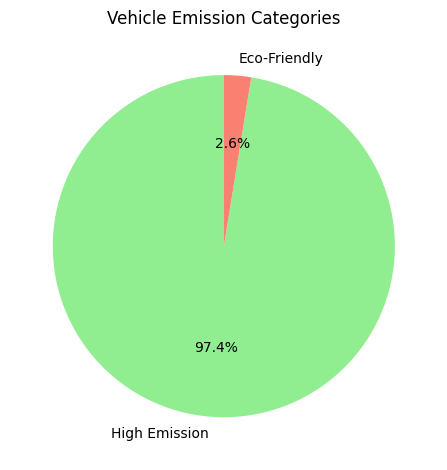

In [10]:
# Can we classify vehicles into "Eco-Friendly" vs. "High Emission" based on thresholds? Set a threshold, e.g., CO2_Emissions < 150 is eco-friendly:
co2['Emission_Category'] = co2['CO2_Emissions'].apply(lambda x: 'Eco-Friendly' if x < 150 else 'High Emission')

# Count how many in each
co2['Emission_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Vehicle Emission Categories')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [12]:
#compare other stats
co2.groupby('Emission_Category')[['Fuel_Consumption_comb(L/100km)', 'Engine_Size']].mean()


,Fuel_Consumption_comb(L/100km),Engine_Size
Emission_Category,,
Eco-Friendly,5.129167,1.945833
High Emission,11.216465,3.248299
